In [27]:
import mglearn 


In [28]:
import matplotlib.pyplot as plt 


In [29]:
import numpy as np 

In [30]:
%matplotlib inline 


Feature importances: [0. 1.]


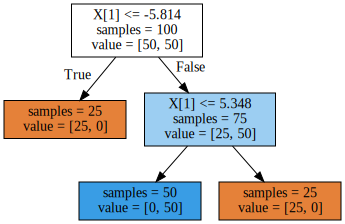

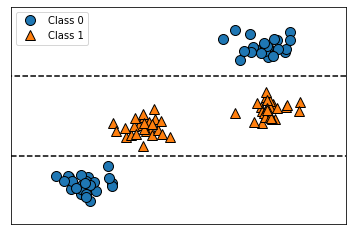

In [31]:
mglearn.plots.plot_tree_not_monotone()

In [32]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test , y_train , y_test = train_test_split (cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)

print('Accuracy on the training subset: {:.3f}'.format(tree.score(X_train,y_train)))
print('Accuracy on the testing subset: {:.3f}'.format(tree.score(X_test,y_test)))


Accuracy on the training subset: 1.000
Accuracy on the testing subset: 0.937


In [33]:
# Accuracy on the training subset: 1.000 so our classifier is overfitting 
# We can apply prooning to prevent overfitting 
# There are two types of prooning : pre and post
# with preprooning we stop the creation of the tree at an earlier stage, we could limit the maximum depth # of the tree or the maximum number of leaves or we could require a specific number of points or nodes so # that it can keep splitting 
# on the other hand in post prooning, we allow the tree to get built, and only there after, we remove # # # irrelevent nodes or nodes that contain little information 

In [34]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train,y_train)
print('Accuracy on the training subset: {:.3f}'.format(tree.score(X_train,y_train)))
print('Accuracy on the testing subset: {:.3f}'.format(tree.score(X_test,y_test)))


Accuracy on the training subset: 0.988
Accuracy on the testing subset: 0.951


In [35]:
# It's much better now 

In [36]:
import graphviz 
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file='cancertree.dot',class_names=['malignant','benign'],feature_names=cancer.feature_names )


![](cancertree.png)

In [37]:
# we can use a property of the decision tree which called feature importances ==> it will show us how much weight each feature carries for decision making 

In [38]:
print('feature importances: {}'.format(tree.feature_importances_))
type(tree.feature_importances_)

feature importances: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


numpy.ndarray

In [39]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


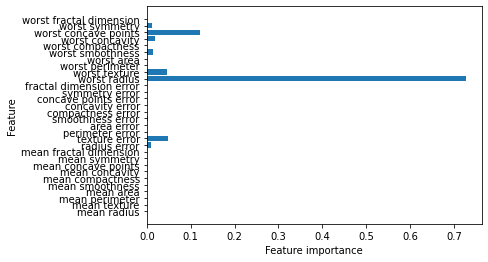

In [42]:
n_features = cancer.data.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features),cancer.feature_names)
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()


In [ ]:
#Advantages of decision tree :
# -easy to view and understand
# -no need to pre-process, normalize, scale and/or standardize features 
# Parameters to work with :
# -max_depth
# -min_sample_leaf, max_sample_leaf
# -max_leaf_nodes
# 
# Disadvantages : 
# - tendency to overfit 
# - poor generalization  